**Text Features**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import umap 

C:\Users\user\anaconda3\envs\computervision\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Dimensionality reduction**

In [2]:
an_df = pd.read_csv(r"C:\Users\user\Desktop\MLPC\annotations.csv")
an_df.head(2)

,task_id,filename,annotator,text,onset,offset,filename_unsafe
0,161977861,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,16.552368,17.271435,560761_tufted titmouse calling.mp3
1,161987165,240538.mp3,4916274343929406460752597829190197300566135449...,A cow bell clinging repeatedly,12.265866,15.420303,240538_AMB - Cowbell stable Stereowav.mp3


In [3]:
an_em = np.load(r"C:\Users\user\Desktop\MLPC\annotations_text_embeddings.npz")["embeddings"]

In [6]:

u=umap.UMAP()
downp = u.fit_transform(an_em)

C:\Users\user\anaconda3\envs\computervision\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\user\anaconda3\envs\computervision\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\Users\user\anaconda3\envs\computervision\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


<Axes: >

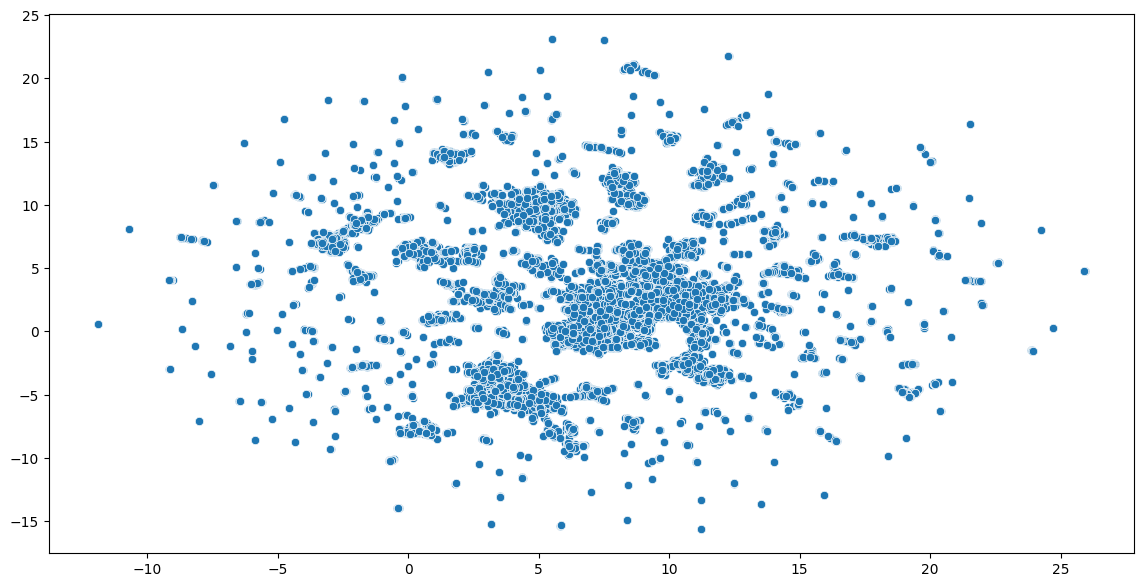

In [7]:
fig,ax = plt.subplots(figsize=(14,7))
sns.scatterplot(x=downp[:,0],y=downp[:,1],ax=ax)

**Clustering**

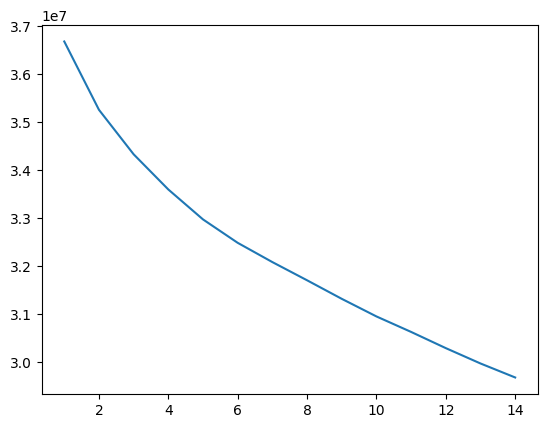

In [91]:
# finding appropriate number of clusters
inertia = []
k_range=range(1,15)
for k in k_range:
    kmeans=KMeans(k,random_state=1234, n_init=14)
    kmeans.fit(scaled_text_features)
    inertia.append(kmeans.inertia_)
plt.plot(k_range,inertia)

In [14]:
s= StandardScaler()
scaled_text_features= s.fit_transform(an_em)
kmeans = KMeans(4)
an_df["cluster"] = kmeans.fit_predict(scaled_text_features)
an_df["c1"] = downp[:,0]
an_df["c2"] = downp[:,1]

<Axes: xlabel='c1', ylabel='c2'>

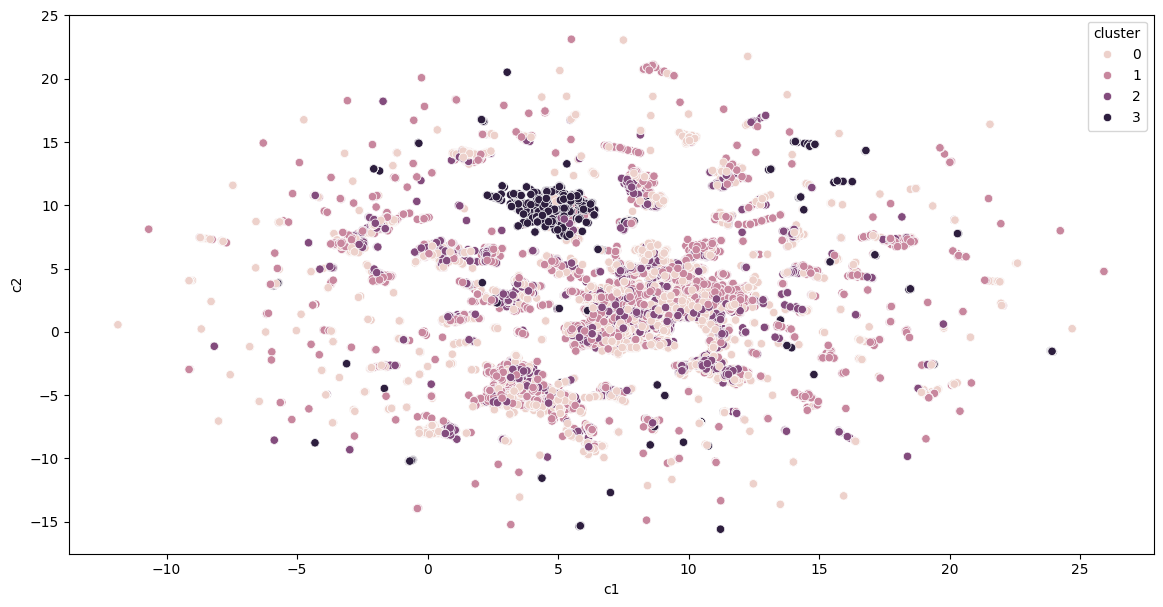

In [15]:
fig,ax= plt.subplots(1,figsize=(14,7))
sns.scatterplot(data=an_df,x="c1",y="c2",hue="cluster",ax=ax)


In [11]:
cluster_stats = an_df.groupby('cluster').agg({
    'c1': ['mean', 'min', 'max', 'count'],
    'c2': ['mean', 'min', 'max']
})
print(cluster_stats)

               c1                                     c2                      
             mean        min        max  count      mean        min        max
cluster                                                                       
0        6.604472  -8.173746  20.212902   8619  2.858500 -13.041823  18.219879
1        6.173533  -5.911409  23.958897   2884  7.155796 -15.599146  20.518450
2        6.804091 -11.867318  24.694231  12316  2.645839 -13.995218  23.057173
3        7.198754 -10.685122  25.921551  12007  3.336029 -15.234282  23.123705


after using UMAP and clustering the text features (annotations embeddings) it i dont think we can find any meaningful clusters.